# Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart

Some thoughts on why I like this setup and how I use it at the [end](notebook.ipynb#Thoughts) of  this notebook.

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


# Load Data

In [8]:
df = pd.read_csv('../boston_311_2023.csv')
df

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,101004113346,2022-01-01 01:24:16,2022-01-04 03:30:00,2022-01-03 04:12:52,ONTIME,Closed,Case Closed. Closed date : 2022-01-03 09:12:52...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Charlestown,2,2,0205,INTERSECTION Elm St & Bartlett St,NaN,42.377998,-71.063353,0101000020E610000072405BF80DC451C0D275123C6230...,Citizens Connect App
1,101004113347,2022-01-01 01:40:20,NaN,2022-01-10 11:30:15,ONTIME,Closed,Case Closed. Closed date : 2022-01-10 16:30:15...,Schedule Bulk Item Pickup,Public Works Department,Sanitation,...,Jamaica Plain,11,Ward 19,1902,6 Moss Hill Rd,2130.0,42.311350,-71.124971,0101000020E6100000AE191D85FFC751C0E259DD4DDA27...,Self Service
2,101004113348,2022-01-01 01:46:29,2022-01-05 03:30:00,2022-01-01 10:10:16,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 15:10:16...,Improper Storage of Trash (Barrels),Public Works Department,Code Enforcement,...,Beacon Hill,3,Ward 3,0306,14 S Russell St,2114.0,42.360720,-71.065880,0101000020E6100000BAC0AB6237C451C01BADBB0E2C2E...,Citizens Connect App
3,101004113349,2022-01-01 01:48:38,2022-01-04 03:30:00,2022-01-01 09:37:26,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 14:37:26...,Empty Litter Basket,Public Works Department,Highway Maintenance,...,Back Bay,6,5,0501,INTERSECTION Bay St & Fayette St,NaN,42.348241,-71.068550,0101000020E61000009E51771E63C451C0C9B81F28932C...,Citizens Connect App
4,101004113351,2022-01-01 02:19:00,2022-01-17 03:30:00,2022-08-05 06:47:07,OVERDUE,Closed,Case Closed. Closed date : 2022-08-05 10:47:07...,Sign Repair,Transportation - Traffic Division,Signs & Signals,...,West Roxbury,12,Ward 20,2015,223 Grove St,2132.0,42.261900,-71.157421,0101000020E61000000B500D2F13CA51C0EF75A8ED8521...,Constituent Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276594,101004615814,2022-12-31 22:44:00,2023-01-01 22:44:01,2023-01-02 01:15:54,OVERDUE,Closed,Case Closed. Closed date : 2023-01-02 06:15:54...,Traffic Signal Inspection,Transportation - Traffic Division,Signs & Signals,...,Roxbury,13,12,1202,INTERSECTION Blue Hill Ave & Warren St,NaN,42.309525,-71.082619,0101000020E6100000FC3BF7A049C551C05762F7809E27...,Constituent Call
276595,101004615816,2022-12-31 22:55:00,2023-01-04 03:30:00,2022-12-31 23:49:57,ONTIME,Closed,Case Closed. Closed date : Sun Jan 01 04:49:57...,Requests for Street Cleaning,Public Works Department,Street Cleaning,...,Dorchester,7,16,1602,INTERSECTION Beach St & Park St,NaN,42.300778,-71.054802,0101000020E610000000BD7DDF81C351C042E4A7E37F26...,Constituent Call
276596,101004615818,2022-12-31 22:56:00,2023-01-04 03:30:00,2023-01-01 05:24:19,ONTIME,Closed,Case Closed. Closed date : Sun Jan 01 10:24:19...,Street Light Knock Downs,Public Works Department,Street Lights,...,Dorchester,7,16,1602,INTERSECTION Beach St & Park St,NaN,42.300778,-71.054802,0101000020E610000000BD7DDF81C351C042E4A7E37F26...,Constituent Call
276597,101004615819,2022-12-31 23:52:00,2023-01-12 03:30:00,NaN,OVERDUE,Open,,Lighting/Electrical,Parks & Recreation Department,Park Maintenance & Safety,...,Dorchester,7,16,1602,INTERSECTION Beach St & Ashland St,NaN,42.301188,-71.055016,0101000020E610000054AE0E6385C351C03A031F558D26...,City Worker App


## Interview the Data

In [9]:
unique_reasons = df['reason'].unique()
print(unique_reasons)


['Enforcement & Abandoned Vehicles' 'Sanitation' 'Code Enforcement'
 'Highway Maintenance' 'Signs & Signals' 'Sidewalk Cover / Manhole'
 'Street Lights' 'Building' 'Street Cleaning' 'Animal Issues'
 'Park Maintenance & Safety' 'Housing' 'Environmental Services'
 'Needle Program' 'Fire Hydrant' 'Trees' 'Recycling'
 'Administrative & General Requests' 'Graffiti' 'Abandoned Bicycle'
 'Employee & General Comments' 'Catchbasin' 'Noise Disturbance'
 'Traffic Management & Engineering' 'Notification' 'Operations' 'Health'
 'Generic Noise Disturbance' 'Weights and Measures' 'Programs' 'Cemetery'
 'Neighborhood Services Issues' 'Pothole' 'Air Pollution Control'
 'Parking Complaints' 'Fire Department' 'Office of The Parking Clerk'
 'Alert Boston' 'Valet' 'Bridge Maintenance' 'Billing' 'Boston Bikes'
 'Massport' 'MBTA' 'General Request']


In [10]:
reason_counts = df['reason'].value_counts()
print(reason_counts)


reason
Enforcement & Abandoned Vehicles     62664
Street Cleaning                      40582
Code Enforcement                     30932
Sanitation                           29538
Highway Maintenance                  26591
Signs & Signals                      10838
Recycling                             8944
Trees                                 8358
Street Lights                         8186
Park Maintenance & Safety             8053
Housing                               7115
Needle Program                        6846
Building                              6064
Environmental Services                4764
Animal Issues                         4031
Graffiti                              2900
Administrative & General Requests     2075
Employee & General Comments           1835
Health                                1283
Abandoned Bicycle                     1058
Noise Disturbance                      698
Traffic Management & Engineering       645
Notification                           616
Catc

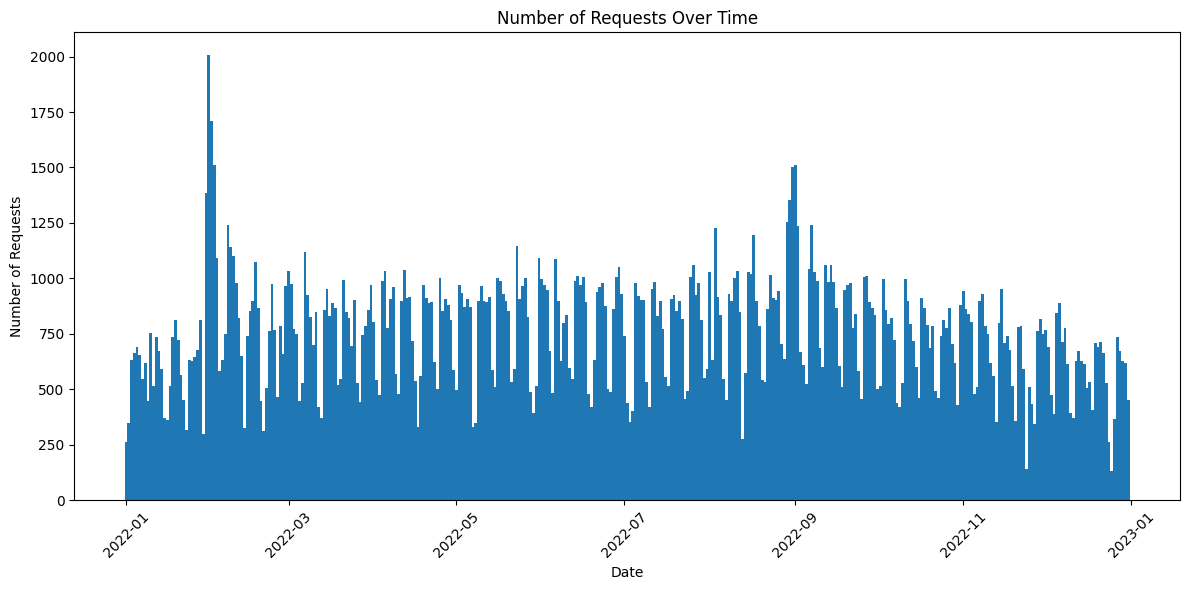

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the "open_dt" column to a datetime format
df['open_dt'] = pd.to_datetime(df['open_dt'])

# Group the data by date and count the number of requests for each date
requests_over_time = df.groupby(df['open_dt'].dt.date).size()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(requests_over_time.index, requests_over_time.values, width=1, align='center')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.title('Number of Requests Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


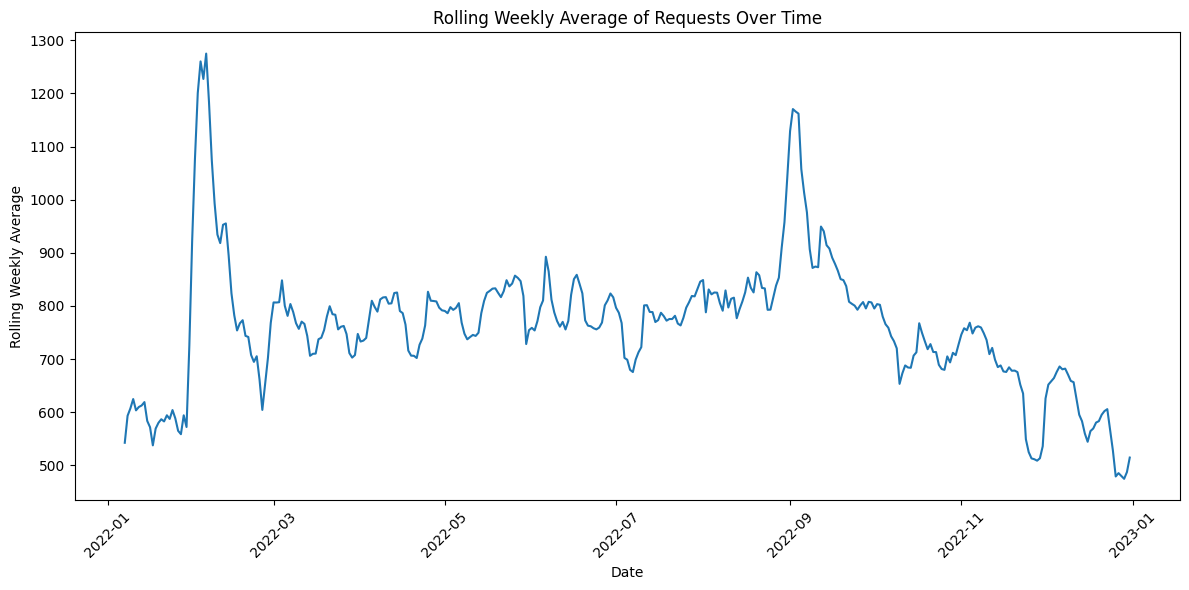

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the "open_dt" column to a datetime format
df['open_dt'] = pd.to_datetime(df['open_dt'])

# Set the "open_dt" column as the index
df.set_index('open_dt', inplace=True)

# Resample the data to get a daily count of requests and then calculate the rolling weekly average
rolling_weekly_avg = df.resample('D').size().rolling(window=7).mean()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(rolling_weekly_avg.index, rolling_weekly_avg.values)
plt.xlabel('Date')
plt.ylabel('Rolling Weekly Average')
plt.title('Rolling Weekly Average of Requests Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


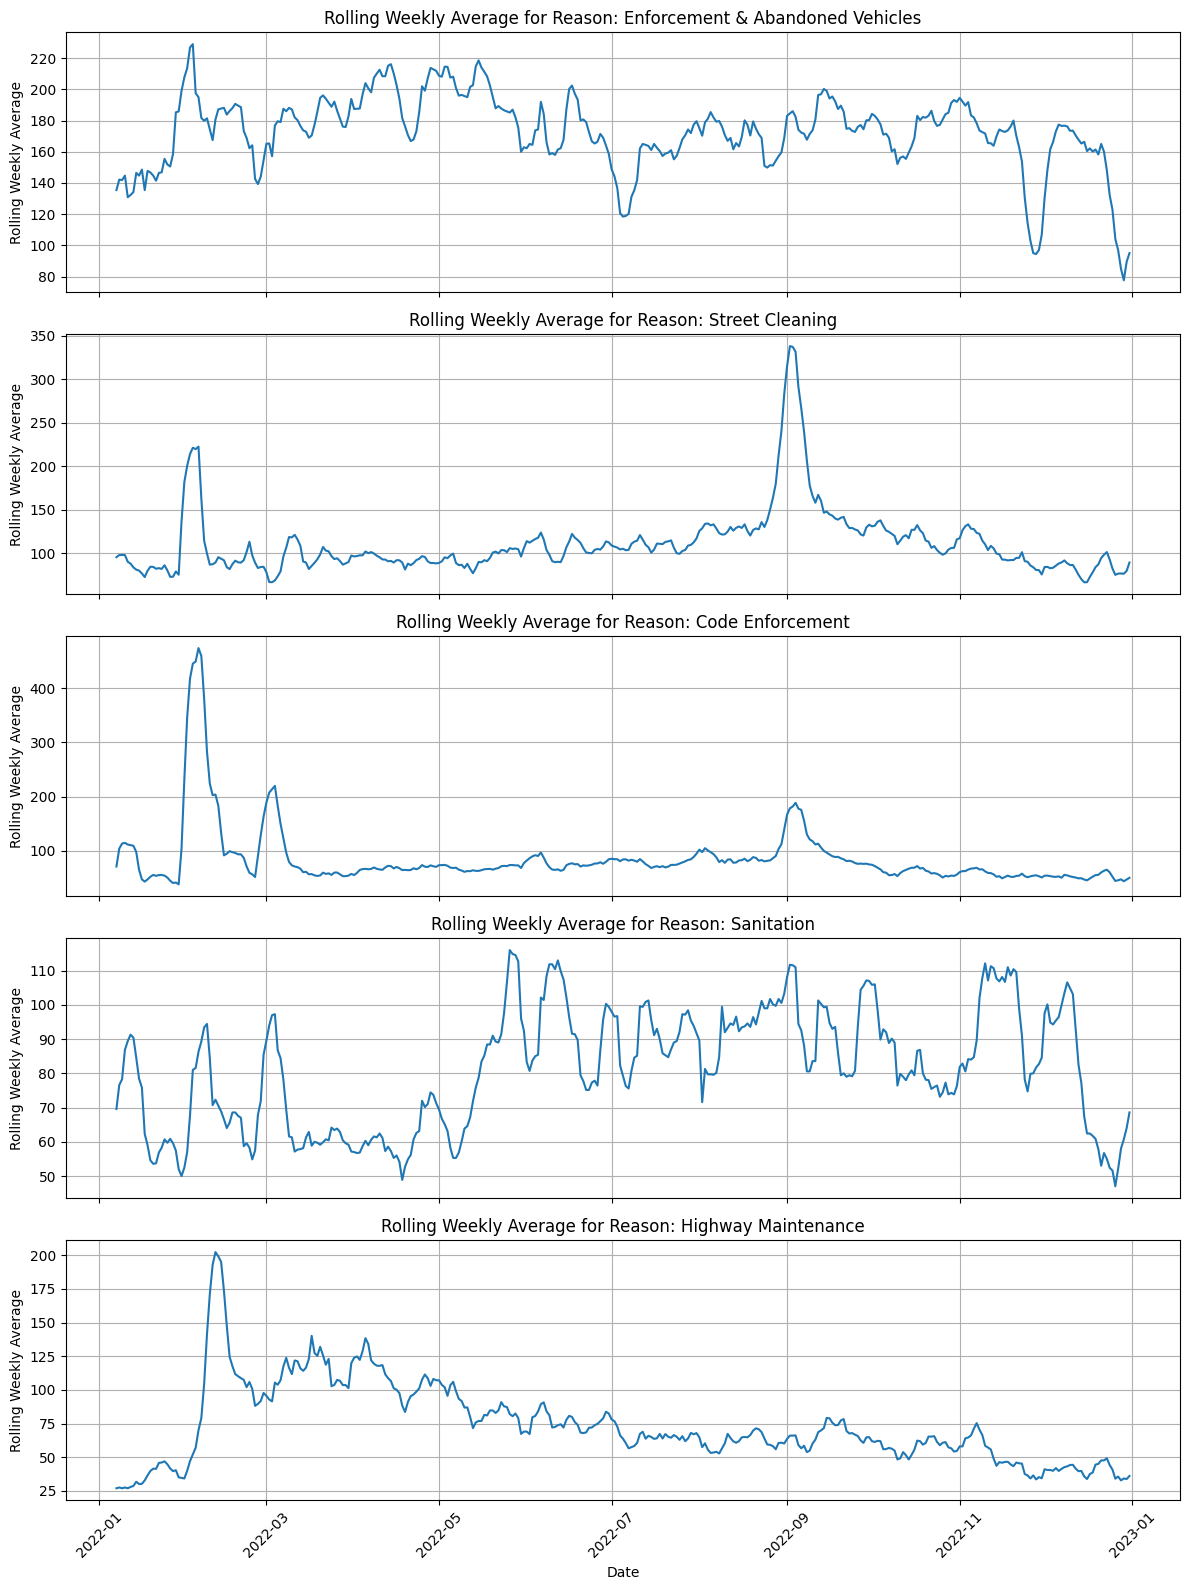

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the "open_dt" column to a datetime format
# df['open_dt'] = pd.to_datetime(df['open_dt'])

# Set the "open_dt" column as the index
# df.set_index('open_dt', inplace=True)

# Get the top 5 most common reasons
top_5_reasons = df['reason'].value_counts().head(5).index

# Create subplots for the top 5 reasons
fig, axes = plt.subplots(5, 1, figsize=(12, 16), sharex=True)

for i, reason in enumerate(top_5_reasons):
    # Filter the DataFrame for the current reason
    filtered_df = df[df['reason'] == reason]
    
    # Resample the data to get a daily count of requests and then calculate the rolling weekly average
    rolling_weekly_avg = filtered_df.resample('D').size().rolling(window=7).mean()
    
    # Plot the rolling weekly average for the current reason
    axes[i].plot(rolling_weekly_avg.index, rolling_weekly_avg.values)
    axes[i].set_title(f'Rolling Weekly Average for Reason: {reason}')
    axes[i].set_ylabel('Rolling Weekly Average')
    axes[i].grid(True)

# Set a common x-axis label
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.reset_index(inplace=True)

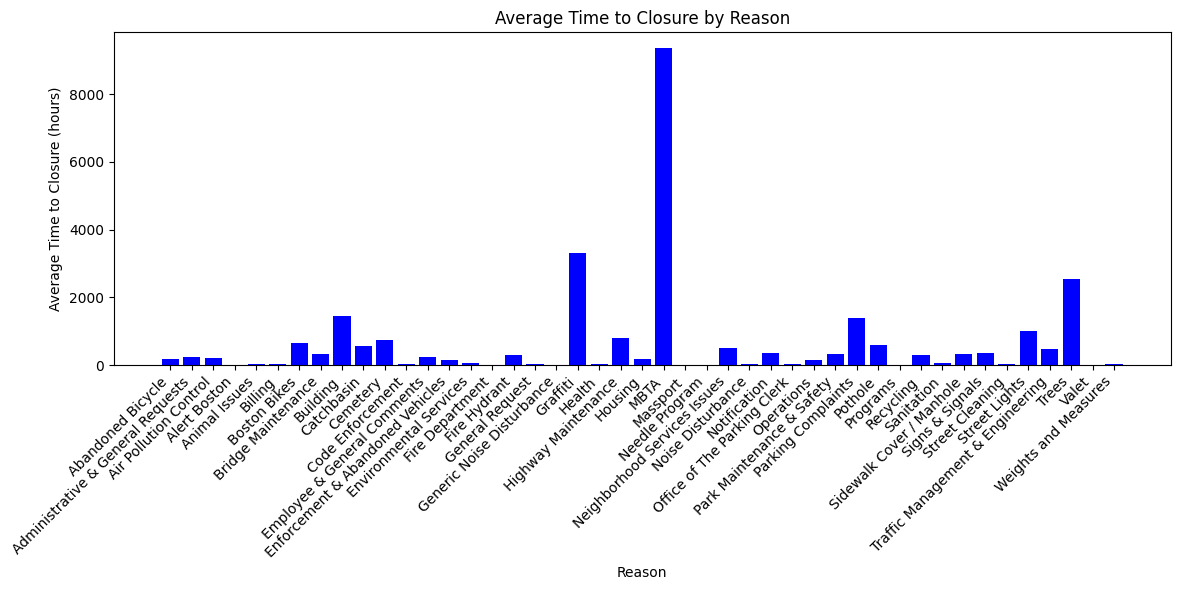

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date columns to datetime objects
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])

# Calculate the time to closure for each request
df['time_to_closure'] = (df['closed_dt'] - df['open_dt']).dt.total_seconds() / 3600  # in hours

# Calculate the average time to closure by reason
average_time_by_reason = df.groupby('reason')['time_to_closure'].mean().reset_index()

# Create a bar chart to display the average time to closure by reason
plt.figure(figsize=(12, 6))
plt.bar(average_time_by_reason['reason'], average_time_by_reason['time_to_closure'], color='blue')
plt.xlabel('Reason')
plt.ylabel('Average Time to Closure (hours)')
plt.title('Average Time to Closure by Reason')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


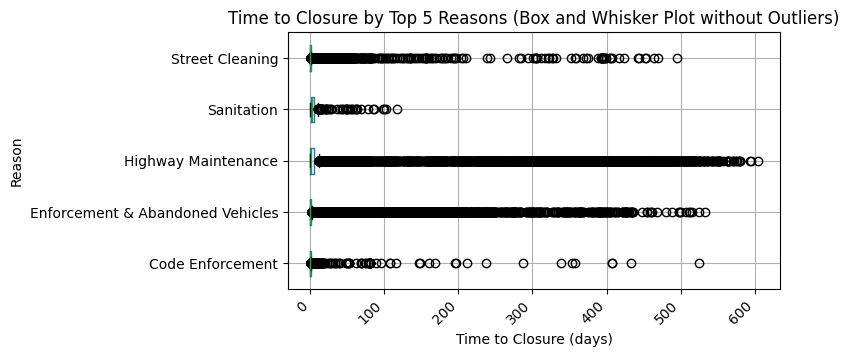

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date columns to datetime objects
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])

# Calculate the time to closure for each request in days
df['time_to_closure_days'] = (df['closed_dt'] - df['open_dt']).dt.total_seconds() / (3600 * 24)  # in days

# Get the top 5 most common reasons
top_5_reasons = df['reason'].value_counts().head(5).index

# Filter the data to include only the top 5 reasons
filtered_df = df[df['reason'].isin(top_5_reasons)]

# Create a box and whisker plot with adjustable height
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the width and height as needed

# Plot the box and whisker plot without outliers
boxplot = filtered_df.boxplot(column='time_to_closure_days', by='reason', vert=False, showfliers=True, ax=ax)

plt.xlabel('Time to Closure (days)')
plt.ylabel('Reason')
plt.title('Time to Closure by Top 5 Reasons (Box and Whisker Plot without Outliers)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.suptitle('')  # Remove the default title
plt.show()


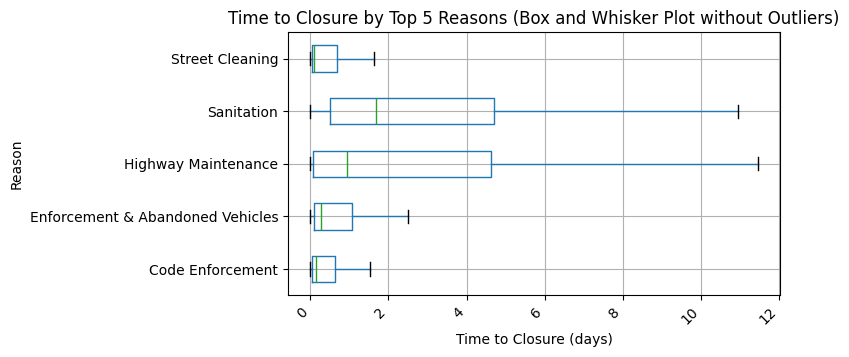

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date columns to datetime objects
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])

# Calculate the time to closure for each request in days
df['time_to_closure_days'] = (df['closed_dt'] - df['open_dt']).dt.total_seconds() / (3600 * 24)  # in days

# Get the top 5 most common reasons
top_5_reasons = df['reason'].value_counts().head(5).index

# Filter the data to include only the top 5 reasons
filtered_df = df[df['reason'].isin(top_5_reasons)]

# Create a box and whisker plot with adjustable height
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the width and height as needed

# Plot the box and whisker plot without outliers
boxplot = filtered_df.boxplot(column='time_to_closure_days', by='reason', vert=False, showfliers=False, ax=ax)

plt.xlabel('Time to Closure (days)')
plt.ylabel('Reason')
plt.title('Time to Closure by Top 5 Reasons (Box and Whisker Plot without Outliers)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.suptitle('')  # Remove the default title
plt.show()
